# End to End Classification

In [1]:
# import EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import ssl
# from scipy import stats
# import statsmodels.api as sm

In [2]:
# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

url = "https://raw.githubusercontent.com/srenna/portfolio/main/4%20-%20End%20to%20End%20Classification/online_retail_II.csv"

# Open the URL using the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Read and print the content
df = pd.read_csv(response) #, header=None)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Key Findings: 
- Description: An object data type column with 540,456 non-null values, indicating there are some missing values.
- Customer ID: A floating-point data type (float64) column with 406,830 non-null values, indicating a significant number of missing values.
- InvoiceDate - Must be converted to datetype. Feature engineering may be required.

In [4]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,541910,541910,540456,541910.000000,541910,541910.000000,406830.000000,541910
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552234,NaN,4.611138,15287.684160,NaN
std,NaN,NaN,NaN,218.080957,NaN,96.759765,1713.603074,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


Key Facts: 
- Negative quantities and prices should be address. Max price appears to be an outlier. 
- UK the most popular country with WHITE HANGING HEART T-LIGHT HOLDER as the most popular item sold. 
- No indication on when data starts and ends - cleaning required. 

In [5]:
df.isnull().mean()

Invoice        0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.249266
Country        0.000000
dtype: float64

In [6]:
# start by dropping the columns that are not needed
df.drop(['Invoice', 'StockCode'], axis=1, inplace=True)

In [7]:
# drop empty Description rows
df = df.dropna(subset=['Description'])

In [8]:
# impute Customer ID with "Unknown"
df['Customer ID'].fillna("Unknown", inplace=True)

/var/folders/tq/xcbrbny93xzfpv_dhf8s78rh0000gn/T/ipykernel_53512/1305978647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer ID'].fillna("Unknown", inplace=True)


In [9]:
# address date time variable
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/var/folders/tq/xcbrbny93xzfpv_dhf8s78rh0000gn/T/ipykernel_53512/2283149163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
# feature engineer the date column 
df['Year'] = df['InvoiceDate'].dt.year.astype(int)
df['Month'] = df['InvoiceDate'].dt.month.astype(int)
df['Day'] = df['InvoiceDate'].dt.day.astype(int)

/var/folders/tq/xcbrbny93xzfpv_dhf8s78rh0000gn/T/ipykernel_53512/2096623175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year.astype(int)
/var/folders/tq/xcbrbny93xzfpv_dhf8s78rh0000gn/T/ipykernel_53512/2096623175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month.astype(int)
/var/folders/tq/xcbrbny93xzfpv_dhf8s78rh0000gn/T/ipykernel_53512/2096623175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [11]:
df.describe(include='all')

,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day
count,540456,540456.000000,540456,540456.000000,540456,540456,540456.000000,540456.000000,540456.000000
unique,4223,NaN,NaN,NaN,4373,38,NaN,NaN,NaN
top,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,Unknown,United Kingdom,NaN,NaN,NaN
freq,2369,NaN,NaN,NaN,133626,494024,NaN,NaN,NaN
mean,NaN,9.603113,2011-07-04 16:21:08.182312704,4.623544,NaN,NaN,2010.921629,7.556700,15.021798
min,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,NaN,2010.000000,1.000000,1.000000
25%,NaN,1.000000,2011-03-28 11:49:00,1.250000,NaN,NaN,2011.000000,5.000000,7.000000
50%,NaN,3.000000,2011-07-20 11:38:00,2.080000,NaN,NaN,2011.000000,8.000000,15.000000
75%,NaN,10.000000,2011-10-19 11:49:00,4.130000,NaN,NaN,2011.000000,11.000000,22.000000
max,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN,2011.000000,12.000000,31.000000


In [12]:
df[df['Price'] < 0]

,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day
299983,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown,United Kingdom,2011,8,12
299984,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown,United Kingdom,2011,8,12


In [13]:
index_to_drop = df[df['Price'] < 0].index
df = df.drop(index_to_drop)

In [14]:
df[df['Quantity'] < 0]
# assume these are returns and not purchases
# add column to data frame to indicate if item was returned or not

,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day
141,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,12,1
154,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,12,1
235,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,12,1
236,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
237,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,12,1
...,...,...,...,...,...,...,...,...,...
540449,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,9
541541,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011,12,9
541715,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011,12,9
541716,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,9


In [15]:
def set_return(quantity):
    if quantity < 0:
        return 1
    else:
        return 0

df['Return'] = df['Quantity'].apply(set_return)

In [16]:
country_counts = df['Country'].value_counts()
# country_counts

<Axes: ylabel='count'>

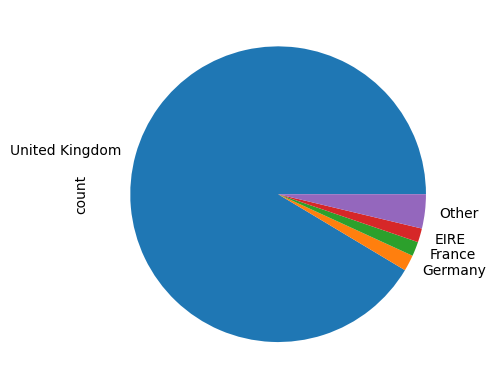

In [17]:
threshold = 2600 
other_countries = country_counts[country_counts < threshold].sum()
country_counts = country_counts[country_counts >= threshold]
country_counts['Other'] = other_countries

country_counts.plot(kind='pie')

In [18]:
# check the prices
df[df['Price'] > 500]['Description'].unique()

array(['DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'Bank Charges',
       'Discount', 'POSTAGE', 'PICNIC BASKET WICKER 60 PIECES', 'SAMPLES',
       'Adjust bad debt', 'CRUK Commission'], dtype=object)

In [19]:
admin_costs = ['DOTCOM POSTAGE', 'Manual', 'AMAZON FEE', 'Bank Charges',
       'Discount', 'POSTAGE', 'SAMPLES',
       'Adjust bad debt', 'CRUK Commission'] #'PICNIC BASKET WICKER 60 PIECES']

df = df[~df['Description'].isin(admin_costs)]

In [20]:
df['Revenue'] = df['Quantity'] * df['Price']

In [21]:
df

,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Day,Return,Revenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,0,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,0,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,0,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,0,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,0,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,0,16.60


Regression Models: If you want to predict a continuous variable like Price or Revenue, you can use regression models such as Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor.

Classification Models: If you want to predict a categorical variable like Return (assuming it's binary or multi-class), you could use classification models like Logistic Regression, Random Forest Classifier, Support Vector Machines, or Neural Networks.
 

Let's determine the likelihood of a return.
- Logistic Regression: A simple yet effective model for binary classification problems. It's easy to implement and understand.
- Support Vector Machines (SVM): Suitable for binary and multi-class problems, SVM tries to find the hyperplane that best divides a dataset into classes.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [23]:
# drop useless columns
df.drop(['InvoiceDate'], axis=1, inplace=True)
df

,Description,Quantity,Price,Customer ID,Country,Year,Month,Day,Return,Revenue
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,0,15.30
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,0,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,0,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011,12,9,0,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011,12,9,0,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011,12,9,0,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011,12,9,0,16.60


In [ ]:
# Select features and target
X = df.drop(['Return'], axis=1) # Include other relevant features as needed
y = df['Return']

cat_columns = ['Description', 'Country']
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often beneficial for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression classifier
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')